## Results

The tune Logistic Regression model will now be scored against the test data

In [26]:
# data manipulation
import pandas as pd
import os
import numpy as np
import pickle

# metrics
from sklearn import metrics

# custom helper functions
from src.models import cross_validate as cv

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'png'

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [15]:
DATA_PATH = '../data/processed/'
OBS_PATH = os.path.join(DATA_PATH, 'observations_features.csv')
RESULTS_PATH = os.path.join(DATA_PATH, 'results.csv')

### Load Data

In [16]:
obs = pd.read_csv(OBS_PATH)
obs.head()

,session_id,seq,buy_event,visitor_id,view_count,session_length,item_views,add_to_cart_count,transaction_count,avg_avail
0,1000001_251341,2.0,0,1000001,1.0,0.0,1.0,0.0,0.0,0.0
1,1000007_251343,2.0,0,1000007,1.0,0.0,1.0,0.0,0.0,0.0
2,1000042_251344,2.0,0,1000042,1.0,0.0,1.0,0.0,0.0,1.0
3,1000057_251346,2.0,0,1000057,1.0,0.0,1.0,0.0,0.0,1.0
4,1000067_251351,2.0,0,1000067,1.0,0.0,1.0,0.0,0.0,0.0


### Test score

In [18]:
MODEL_PATH = '../models/'
LOG_PATH = os.path.join(MODEL_PATH, 'log_reg_tuned.pkl')

log_reg_model = pickle.load(open(LOG_PATH, 'rb'))

In [21]:
X_train, X_test, y_train, y_test = cv.create_Xy(obs)

y_test_probs = log_reg_model.predict_proba(X_test)[:,1]
y_test_score = (y_test_probs >= 0.5).astype(int)
metrics.roc_auc_score(y_test, y_test_probs)

0.7708470859897216

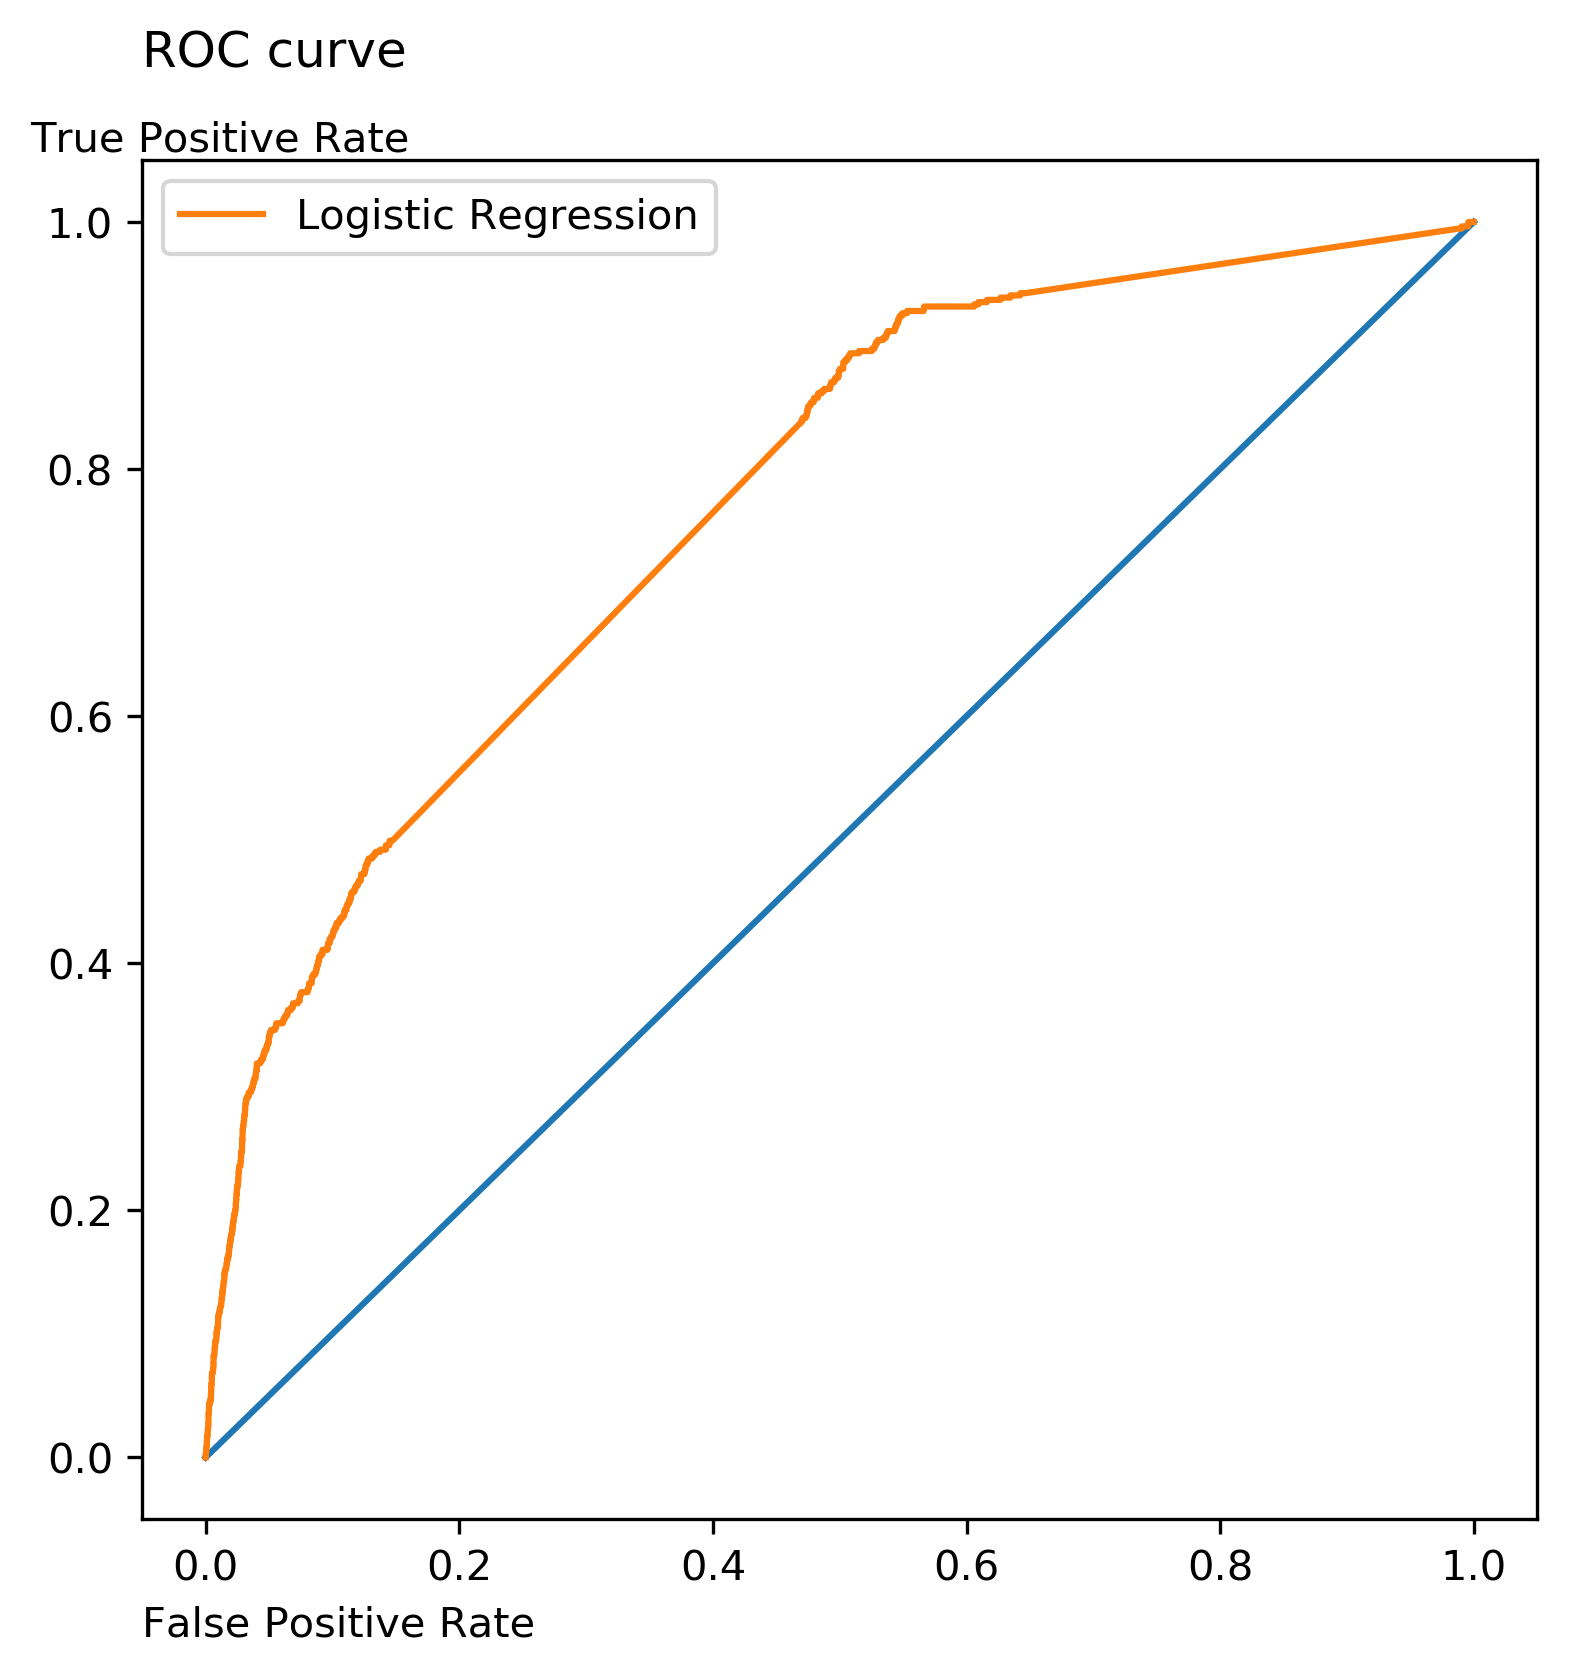

In [27]:
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, y_test_probs)

plt.figure(figsize=(6,6))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_gb, tpr_gb, label='Logistic Regression')
plt.legend()

title_style = {
    'position':(0,1.05),
    'horizontalalignment': 'left'
}

plt.xlabel('False Positive Rate', {
        'horizontalalignment':'left', 
        'fontweight':'ultralight', 
        'position':(0,0)})

plt.ylabel('True Positive Rate', {
    'horizontalalignment':'left', 
    'fontweight':'ultralight', 
    'position':(-0.5,1),
    'rotation':'horizontal'
    })
plt.title('ROC curve', title_style );

### Odds ratio for each feature

In [39]:
np.e ** log_reg_model.steps[2][1].coef_

array([[1.14800444, 1.19816781, 0.79559006, 1.91130383, 0.97076493,
        2.08931995]])